In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

In [2]:
russell = pd.read_csv('Russell2000 Daily Returns.csv')

russell['RET'] = pd.to_numeric(russell['RET'], errors='coerce')
russell['RETX'] = pd.to_numeric(russell['RETX'], errors='coerce')

russell.head(10)

C:\Users\joel3\AppData\Local\Temp\ipykernel_25584\654371068.py:1: DtypeWarning: Columns (2,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  russell = pd.read_csv('Russell2000 Daily Returns.csv')


,PERMNO,date,SICCD,TICKER,COMNAM,HSICIG,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,NUMTRD,RETX,sprtrn,enterdate,positive,negative,total,market_cap
0,10026,2023-01-03,2052,JJSF,J & J SNACK FOODS CORP,NaN,147.08000,151.92000,151.48000,89954.0,0.011823,19229.0,3627.0,0.011823,-0.004001,2023-01-03,0.0,0.0,2.0,2.912809e+06
1,10026,2023-01-04,2052,JJSF,J & J SNACK FOODS CORP,NaN,150.24001,153.09000,151.22000,52980.0,-0.001716,19229.0,2367.0,-0.001716,0.007539,NaN,0.0,0.0,0.0,2.907809e+06
2,10026,2023-01-05,2052,JJSF,J & J SNACK FOODS CORP,NaN,148.68500,153.00000,149.60001,60472.0,-0.010713,19229.0,2510.0,-0.010713,-0.011646,NaN,0.0,0.0,0.0,2.876659e+06
3,10026,2023-01-06,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.85001,153.32001,152.64000,57034.0,0.020321,19229.0,5521.0,0.020321,0.022841,2023-01-06,0.0,0.0,2.0,2.935115e+06
4,10026,2023-01-09,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.39999,152.49001,149.61000,63214.0,-0.019851,19229.0,3466.0,-0.019851,-0.000768,NaN,0.0,0.0,0.0,2.876851e+06
5,10026,2023-01-10,2052,JJSF,J & J SNACK FOODS CORP,NaN,148.88000,151.06000,149.87000,112759.0,0.001738,19229.0,3001.0,0.001738,0.006978,NaN,0.0,0.0,0.0,2.881850e+06
6,10026,2023-01-11,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.32001,152.53999,152.39000,57350.0,0.016815,19229.0,2634.0,0.016815,0.012849,NaN,0.0,0.0,0.0,2.930307e+06
7,10026,2023-01-12,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.81500,153.10001,152.42999,70931.0,0.000262,19229.0,2786.0,0.000262,0.003416,NaN,0.0,0.0,0.0,2.931076e+06
8,10026,2023-01-13,2052,JJSF,J & J SNACK FOODS CORP,NaN,150.50000,154.67000,154.49001,50967.0,0.013514,19229.0,2605.0,0.013514,0.003997,NaN,0.0,0.0,0.0,2.970688e+06
9,10026,2023-01-17,2052,JJSF,J & J SNACK FOODS CORP,NaN,153.66000,157.09000,154.22000,67542.0,-0.001748,19229.0,2452.0,-0.001748,-0.002030,NaN,0.0,0.0,0.0,2.965496e+06


         market_cap        SHROUT           VOL            PRC          ASKHI  \
count  1.014040e+05  1.014040e+05  1.014040e+05  101404.000000  101404.000000   
mean   2.035792e+07  2.435799e+05  2.331769e+06     218.913995     357.412896   
std    1.013209e+08  6.821053e+05  6.753348e+06    5786.534339   11765.777883   
min   -1.471320e+05  9.710000e+02  4.668000e+02     -15.343500       0.539900   
25%    1.369102e+06  4.540500e+04  2.871739e+05      20.566000      21.625000   
50%    3.294970e+06  8.766000e+04  7.158251e+05      42.472250      44.202500   
75%    1.021949e+07  1.961030e+05  1.847937e+06      92.022500      95.150000   
max    3.061528e+09  1.584117e+07  2.245165e+08  280125.338999  566570.000000   

               BIDLO          total       negative       positive  \
count  101404.000000  101418.000000  101418.000000  101418.000000   
mean       85.934613       1.030813       0.010018       0.107930   
std       211.390680       1.740767       0.129615       0.4635

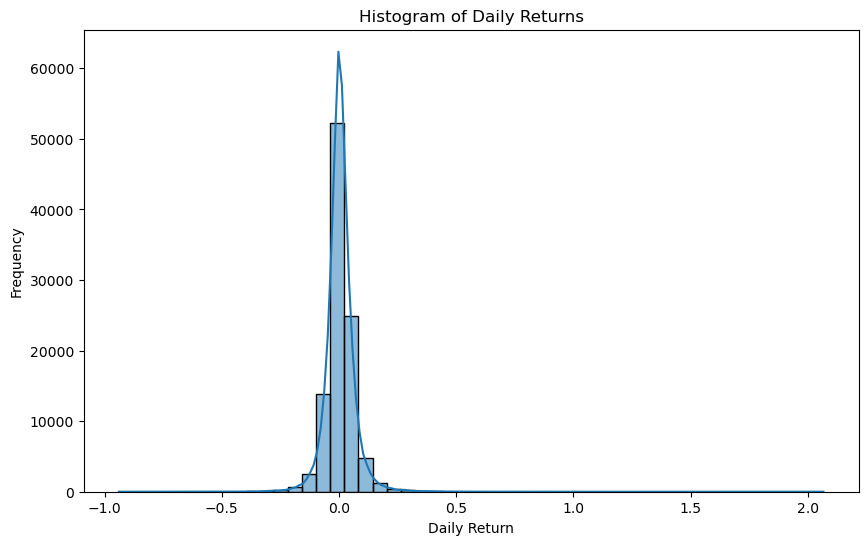

In [3]:
# Change date format
russell['date'] = pd.to_datetime(russell['date'], format='%Y-%m-%d')

# Remove the columns HSICIG and enterdate
russell.drop(columns=['HSICIG', 'enterdate', 'NUMTRD'], inplace=True)

# Reset index
russell.reset_index(drop=True, inplace=True)


# Group by week and ticker and perform aggregations
agg_columns = {
    'SICCD': 'first',
    'COMNAM': 'first',
    'market_cap': 'mean',
    'SHROUT': 'mean',
    'VOL': 'mean',
    'PRC': 'mean',
    'ASKHI': 'max',
    'BIDLO': 'min',
    'total': 'sum',
    'negative': 'sum',
    'positive': 'sum',
    'sprtrn': lambda x: (1 + x).prod() - 1,
    'RET': lambda x: (1 + x).prod() - 1
}

# Group by 'TICKER' and resample the data to weekly frequency
russell = russell.groupby('TICKER').resample('W-MON', on='date').agg(agg_columns).reset_index()

# Adding lagged columns
russell['next_week_return'] = russell.groupby('TICKER')['RET'].shift(-1)
russell['last_week_return'] = russell.groupby('TICKER')['RET'].shift(1)
russell['last_week_volume'] = russell.groupby('TICKER')['VOL'].shift(1)

# Add columns for moving averages
russell['2_week_ma'] = russell.groupby('TICKER')['PRC'].rolling(window=2).mean().reset_index(drop=True)
russell['3_week_ma'] = russell.groupby('TICKER')['PRC'].rolling(window=3).mean().reset_index(drop=True)
russell['4_week_ma'] = russell.groupby('TICKER')['PRC'].rolling(window=4).mean().reset_index(drop=True)

# Create "proper?" column
russell['proper?'] = (russell['2_week_ma'] > russell['3_week_ma']) & (russell['3_week_ma'] > russell['4_week_ma']).astype(int)

# Create price minus 
russell['Ask_minus_Bid'] = russell['ASKHI'] - russell['BIDLO']

# Create comp_size column
russell['comp_size'] = pd.qcut(russell['market_cap'], q=10, labels=False)

# Display summary statistics
print(russell.describe())

# Plot histogram of returns
plt.figure(figsize=(10, 6))
sns.histplot(data=russell, x='RET', bins=50, kde=True)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


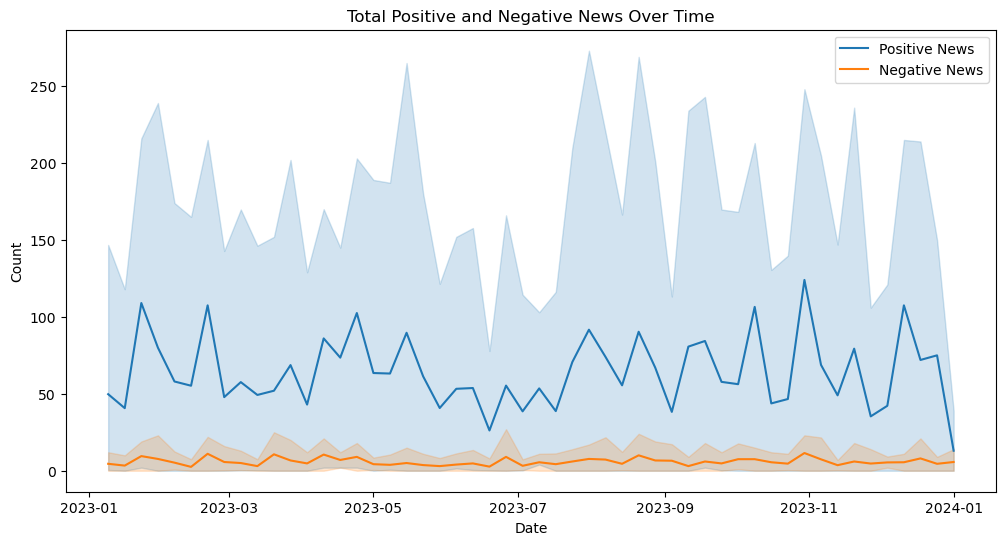

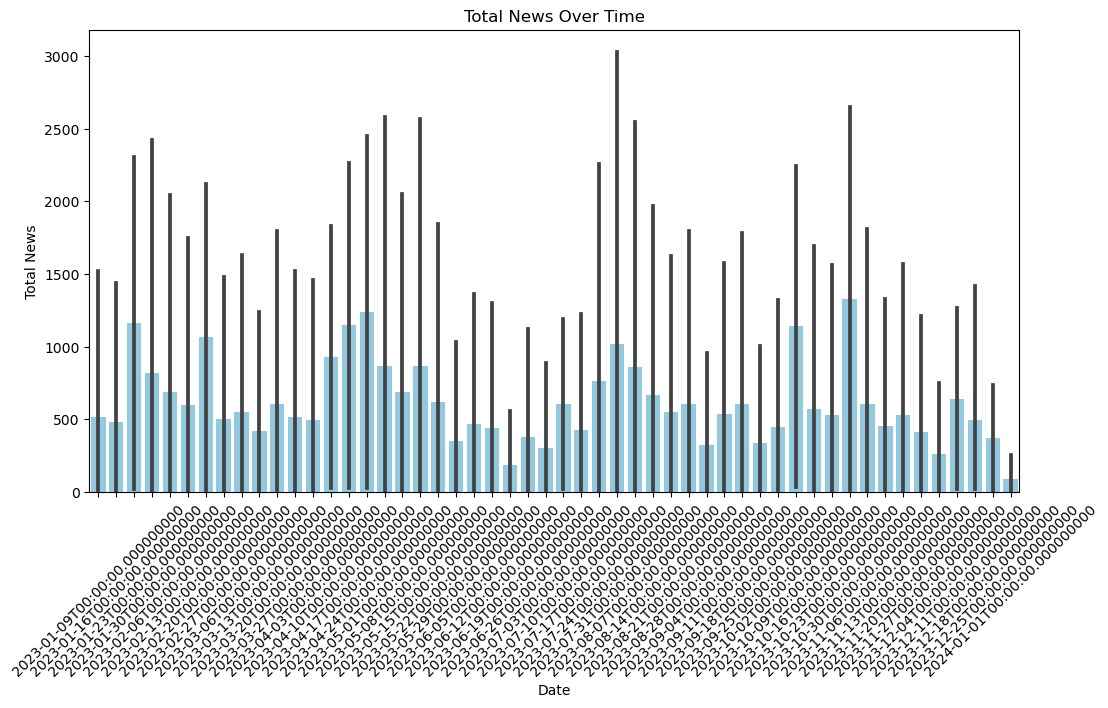

In [4]:
# Daily aggregation
daily_summary = russell.groupby(['date', 'sprtrn']).agg(
    sum_positive=('positive', 'sum'),
    sum_negative=('negative', 'sum'),
    sum_total=('total', 'sum')
).reset_index()

# Plot line chart of total positive and negative news over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_summary, x='date', y='sum_positive', label='Positive News')
sns.lineplot(data=daily_summary, x='date', y='sum_negative', label='Negative News')
plt.title('Total Positive and Negative News Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plot bar chart of total news over time
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_summary, x='date', y='sum_total', color='skyblue')
plt.title('Total News Over Time')
plt.xlabel('Date')
plt.ylabel('Total News')
plt.xticks(rotation=45)
plt.show()

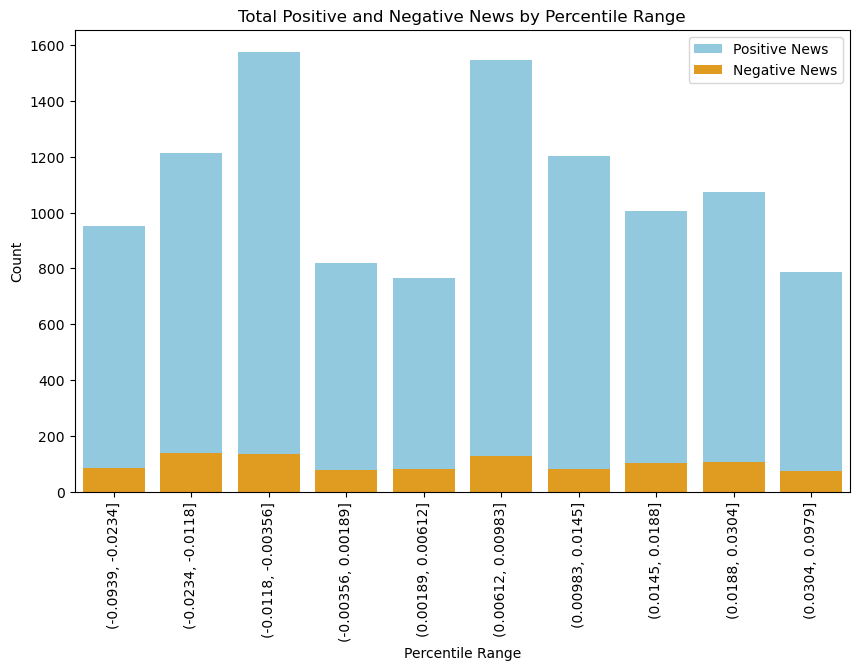

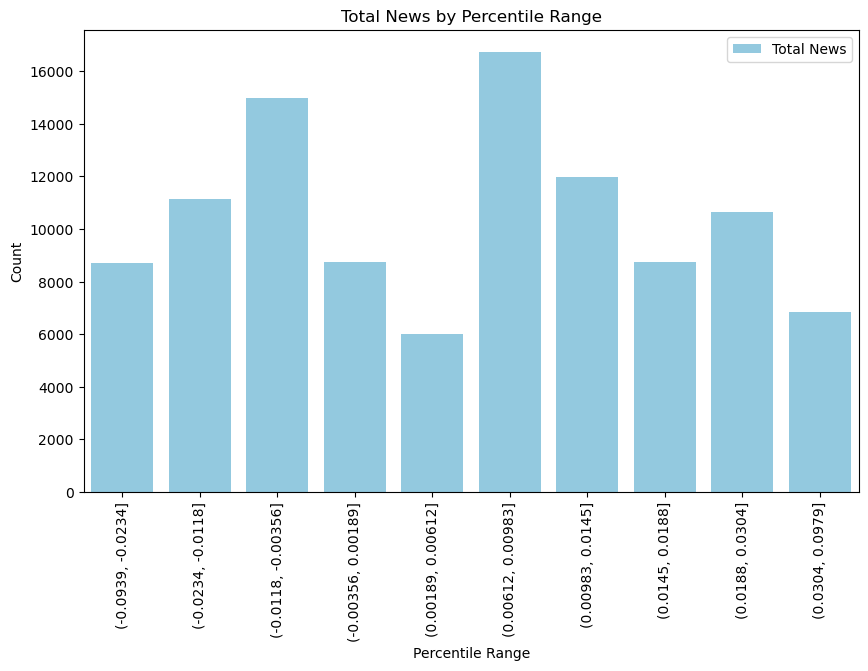

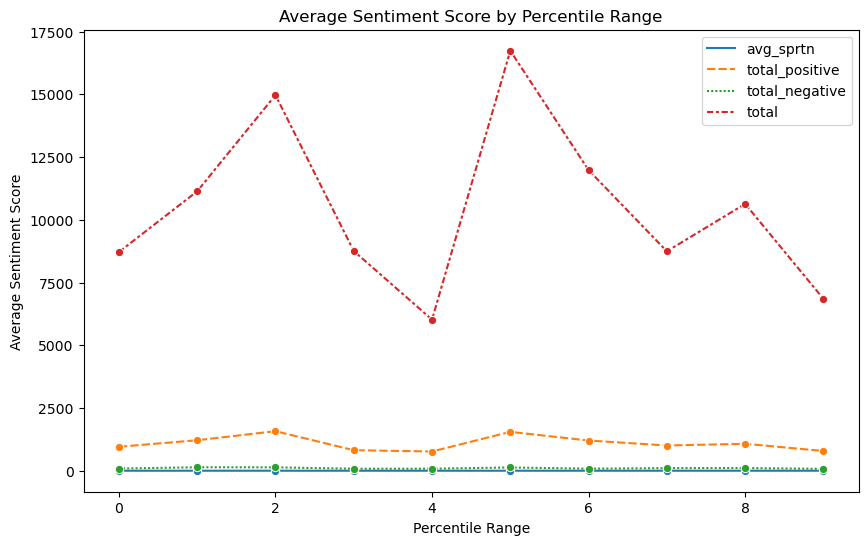

In [5]:
# Percentile summary
ranked_sprtrn = daily_summary.copy()
ranked_sprtrn['sprtrn_percentile'] = pd.qcut(ranked_sprtrn['sprtrn'], q=10, labels=False)
ranked_sprtrn['percentile_range'] = pd.qcut(ranked_sprtrn['sprtrn'], q=10)

percentile_summary = ranked_sprtrn.groupby('percentile_range').agg(
    avg_sprtn=('sprtrn', 'mean'),
    total_positive=('sum_positive', 'sum'),
    total_negative=('sum_negative', 'sum'),
    total=('sum_total', 'sum')
).reset_index()

# Plot bar chart of total positive and negative news by percentile range
plt.figure(figsize=(10, 6))
sns.barplot(data=percentile_summary, x='percentile_range', y='total_positive', color='skyblue', label='Positive News')
sns.barplot(data=percentile_summary, x='percentile_range', y='total_negative', color='orange', label='Negative News')
plt.title('Total Positive and Negative News by Percentile Range')
plt.xlabel('Percentile Range')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.legend()
plt.show()

# Plot bar chart of total positive and negative news by percentile range
plt.figure(figsize=(10, 6))
sns.barplot(data=percentile_summary, x='percentile_range', y='total', color='skyblue', label='Total News')
plt.title('Total News by Percentile Range')
plt.xlabel('Percentile Range')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.legend()
plt.show()

# Plot line chart of average sentiment score by percentile range
plt.figure(figsize=(10, 6))
sns.lineplot(data=percentile_summary.drop(columns='percentile_range'), marker='o', color='green')
plt.title('Average Sentiment Score by Percentile Range')
plt.xlabel('Percentile Range')
plt.ylabel('Average Sentiment Score')
plt.show()


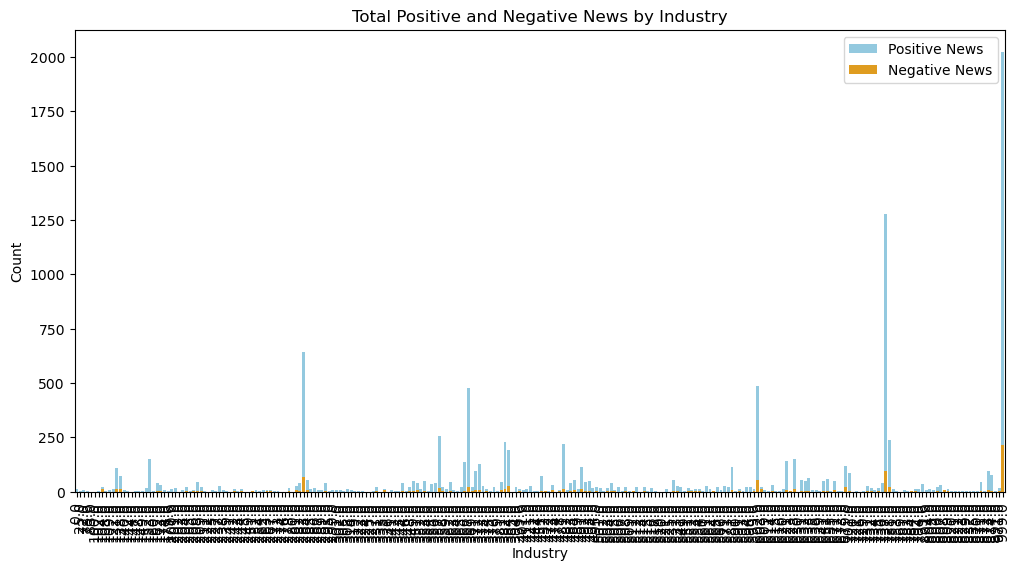

In [6]:
# Assuming 'russell' is your DataFrame containing the data
russell['SICCD'] = pd.to_numeric(russell['SICCD'], errors='coerce')

# Industry summary
industry_summary = russell.groupby(russell['SICCD'] // 10).agg(
    num_firms=('TICKER', 'nunique'),
    cum_ret=('RET', 'sum'),
    total_positive=('positive', 'sum'),
    total_negative=('negative', 'sum'),
    total=('total', 'sum')
).reset_index()

industry_summary['positive_perc'] = industry_summary['total_positive'] / industry_summary['total']
industry_summary['negative_perc'] = industry_summary['total_negative'] / industry_summary['total']

# Plot bar chart of total positive and negative news by industry
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_summary, x='SICCD', y='total_positive', color='skyblue', label='Positive News')
sns.barplot(data=industry_summary, x='SICCD', y='total_negative', color='orange', label='Negative News')
plt.title('Total Positive and Negative News by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.legend()
plt.show()


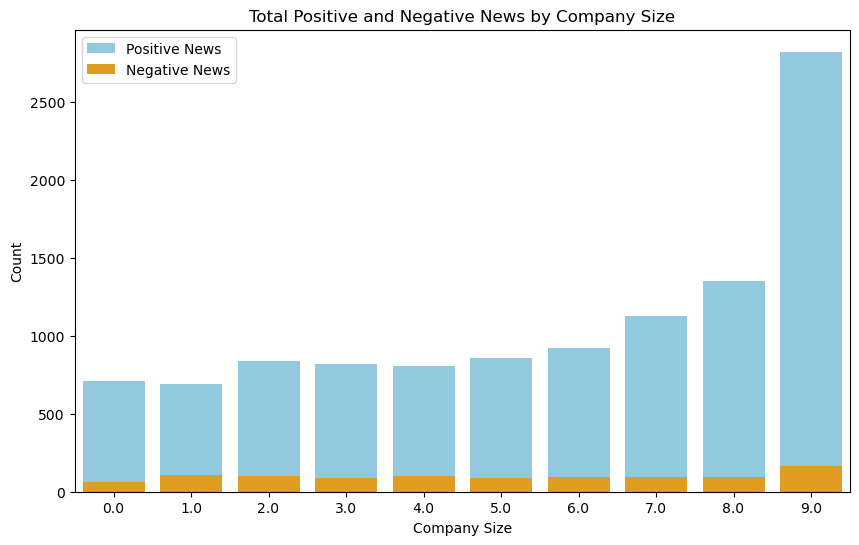

In [7]:
# Company size summary
stock_size = russell.copy()
stock_size['comp_size'] = pd.qcut(stock_size['market_cap'], q=10, labels=False)
company_size_summary = stock_size.groupby('comp_size').agg(
    sum_ret=('RET', 'sum'),
    total_positive=('positive', 'sum'),
    total_negative=('negative', 'sum'),
    total=('total', 'sum')
).reset_index()

company_size_summary['positive_perc'] = company_size_summary['total_positive'] / company_size_summary['total']
company_size_summary['negative_perc'] = company_size_summary['total_negative'] / company_size_summary['total']

# Plot bar chart of total positive and negative news by company size
plt.figure(figsize=(10, 6))
sns.barplot(data=company_size_summary, x='comp_size', y='total_positive', color='skyblue', label='Positive News')
sns.barplot(data=company_size_summary, x='comp_size', y='total_negative', color='orange', label='Negative News')
plt.title('Total Positive and Negative News by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.legend()
plt.show()


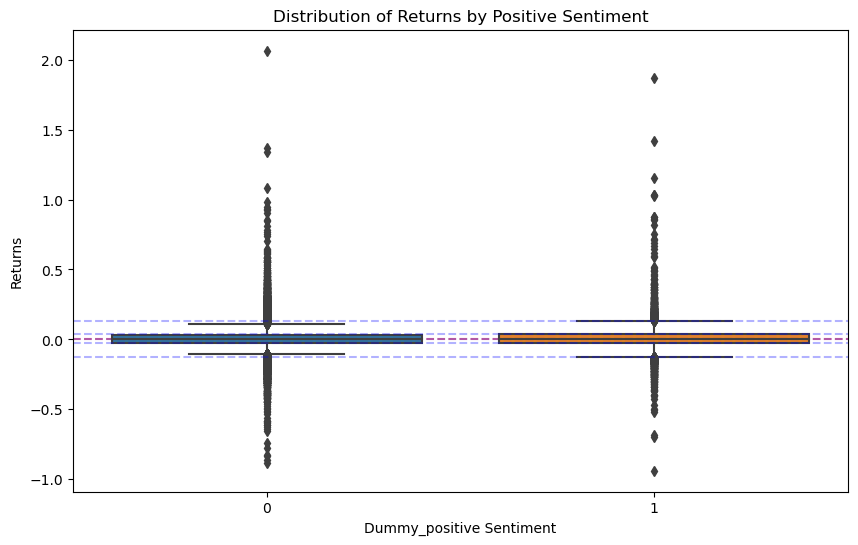

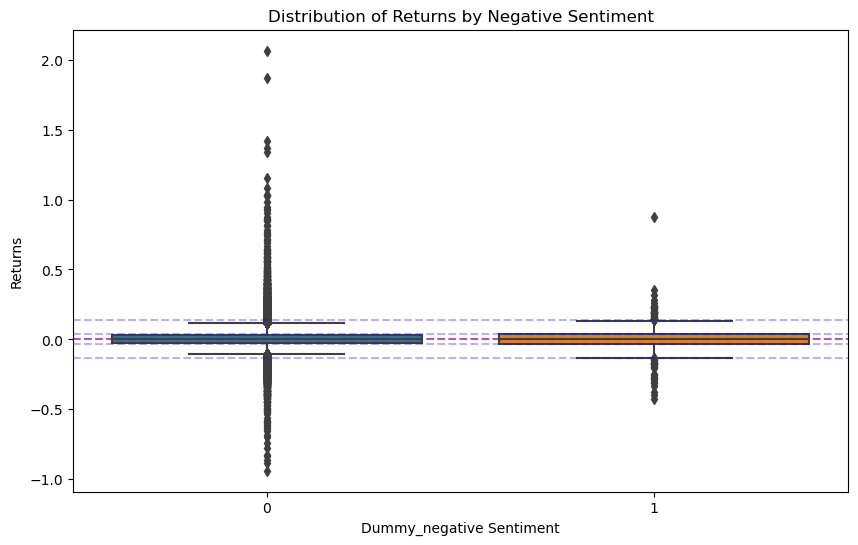

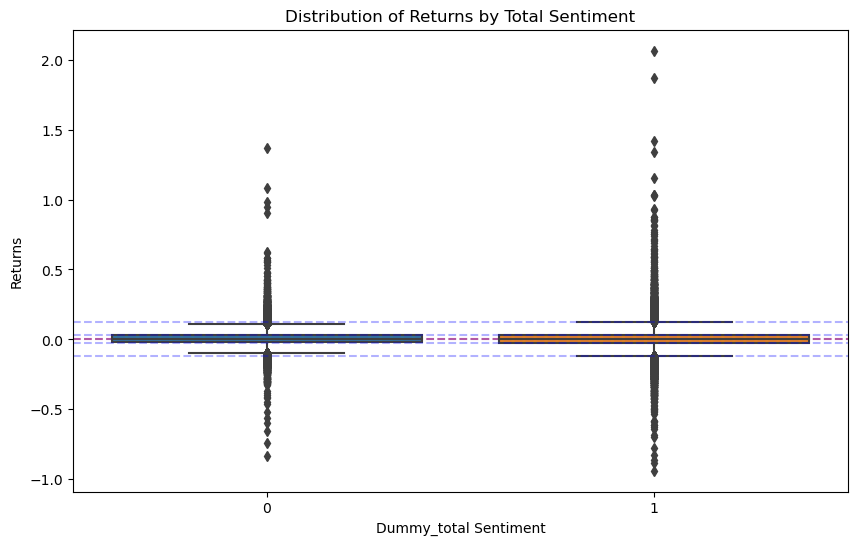

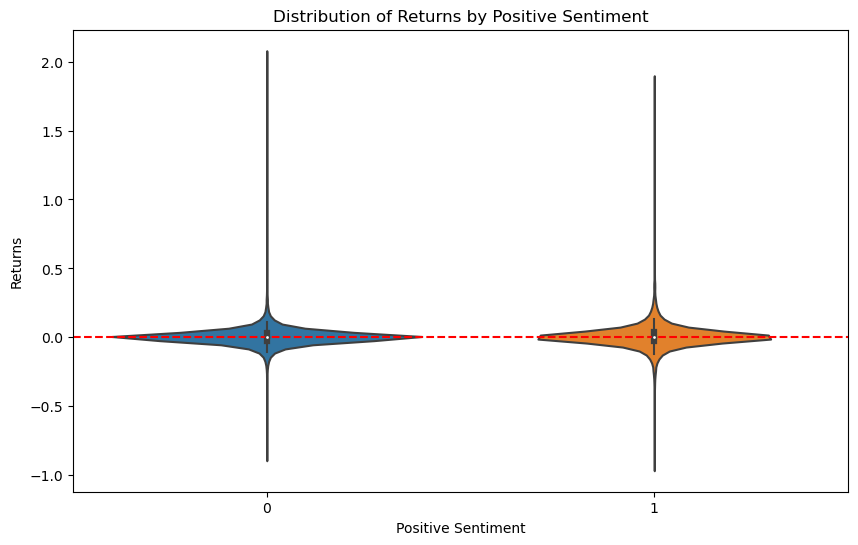

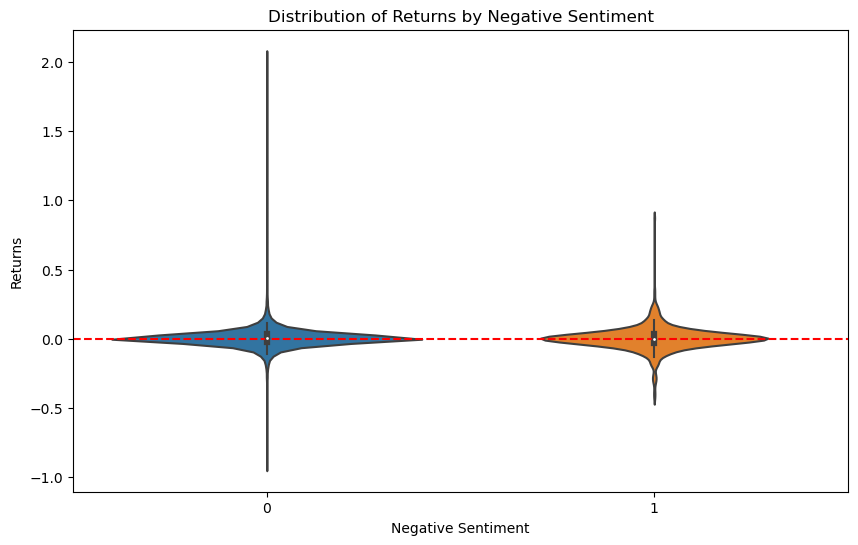

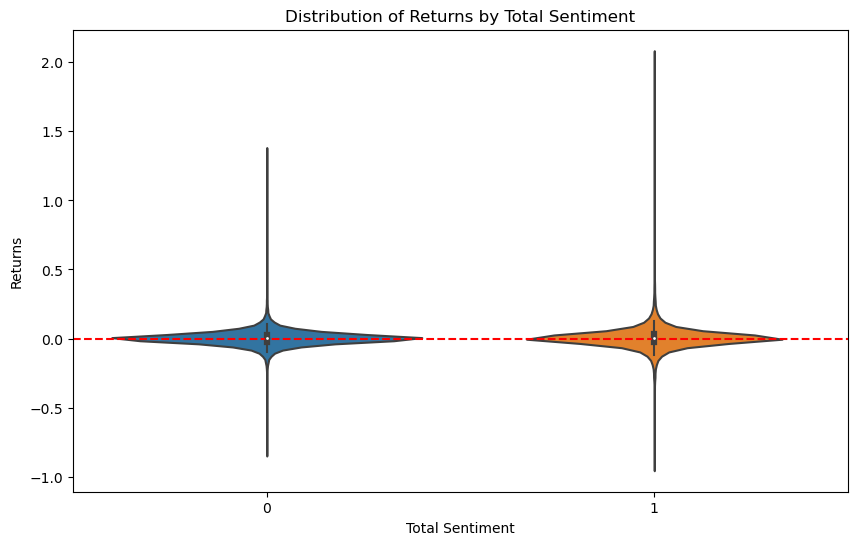

In [8]:
# Create dummy_negative column
russell['dummy_negative'] = (russell['negative'] >= 1).astype(int)

# Create dummy_positive column
russell['dummy_positive'] = (russell['positive'] >= 1).astype(int)

# Create dummy_total column
russell['dummy_total'] = (russell['total'] >= 1).astype(int)


# Function to plot with additional lines
def plot_with_lines(data, x_col, y_col, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_col, y=y_col, data=data)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    # Add blue dashed lines for critical points of value >= 1 category
    for i, box in enumerate(data.groupby(x_col)[y_col]):
        if box[0] == 1:
            quartiles = box[1].quantile([0.25, 0.5, 0.75])
            plt.axhline(y=quartiles[0.25], color='blue', linestyle='--', alpha=0.3)
            plt.axhline(y=quartiles[0.5], color='blue', linestyle='--', alpha=0.3)
            plt.axhline(y=quartiles[0.75], color='blue', linestyle='--', alpha=0.3)              
            iqr = quartiles[0.75] - quartiles[0.25]
            upper_limit = 1.5 * iqr + quartiles[0.75]
            lower_limit = quartiles[0.25] - 1.5 * iqr
            # Add additional blue dashed lines
            plt.axhline(y=upper_limit, color='blue', linestyle='--', alpha=0.3)  # Upper limit
            plt.axhline(y=lower_limit, color='blue', linestyle='--', alpha=0.3)  # Lower limit
    plt.title(title)
    plt.xlabel(x_col.capitalize() + ' Sentiment')
    plt.ylabel('Returns')
    plt.show()


# Box plot for dummy_positive
plot_with_lines(russell, 'dummy_positive', 'RET', 'Distribution of Returns by Positive Sentiment')

# Box plot for dummy_negative
plot_with_lines(russell, 'dummy_negative', 'RET', 'Distribution of Returns by Negative Sentiment')

# Box plot for dummy_total
plot_with_lines(russell, 'dummy_total', 'RET', 'Distribution of Returns by Total Sentiment')

# Violin plot for dummy_positive
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_positive', y='RET', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Positive Sentiment')
plt.xlabel('Positive Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_negative
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_negative', y='RET', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Negative Sentiment')
plt.xlabel('Negative Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_total
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_total', y='RET', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Total Sentiment')
plt.xlabel('Total Sentiment')
plt.ylabel('Returns')
plt.show()


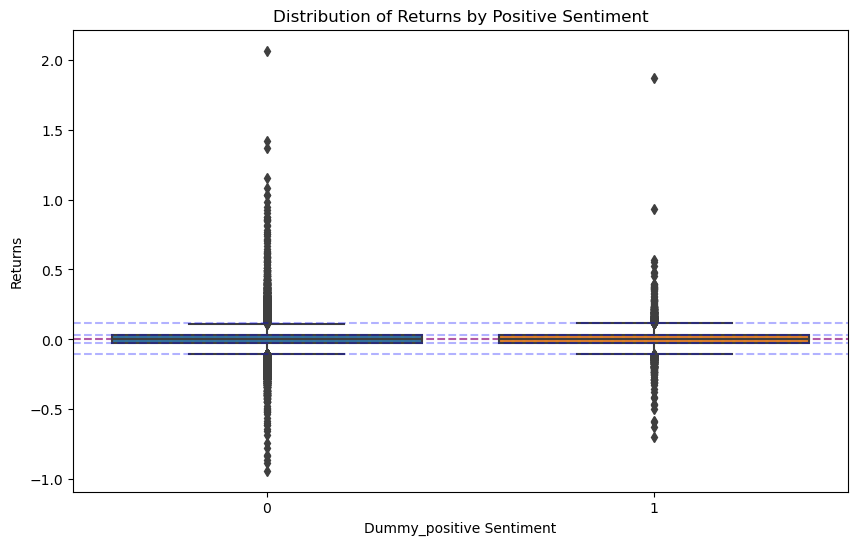

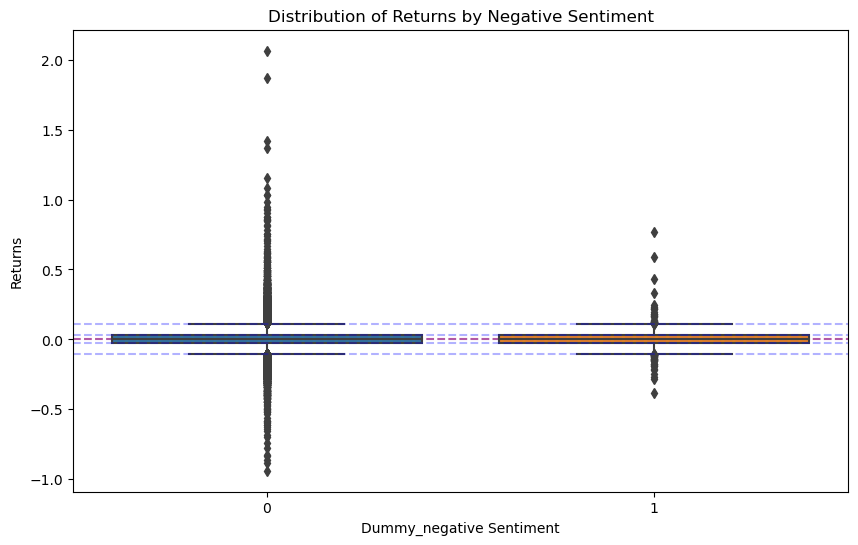

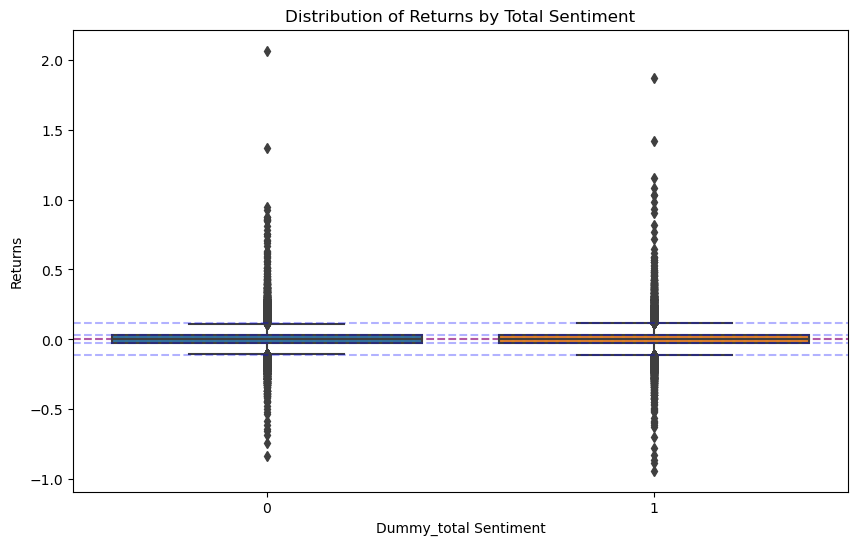

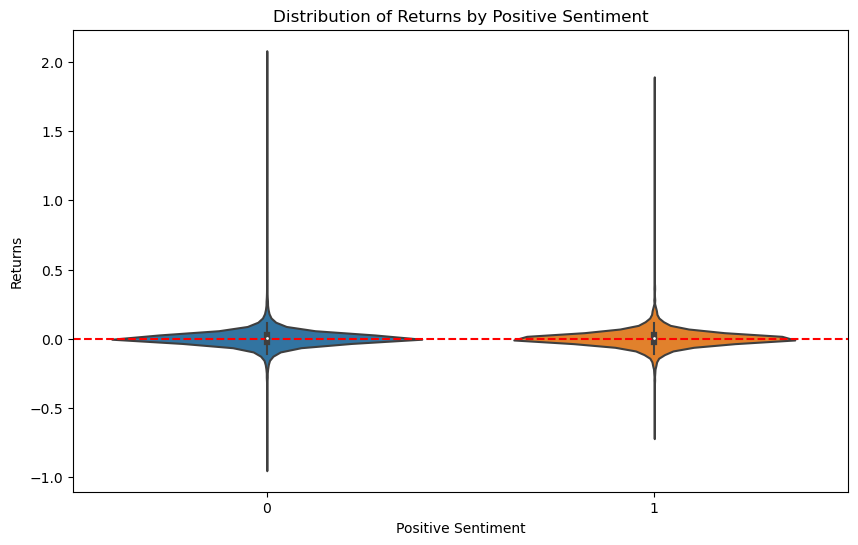

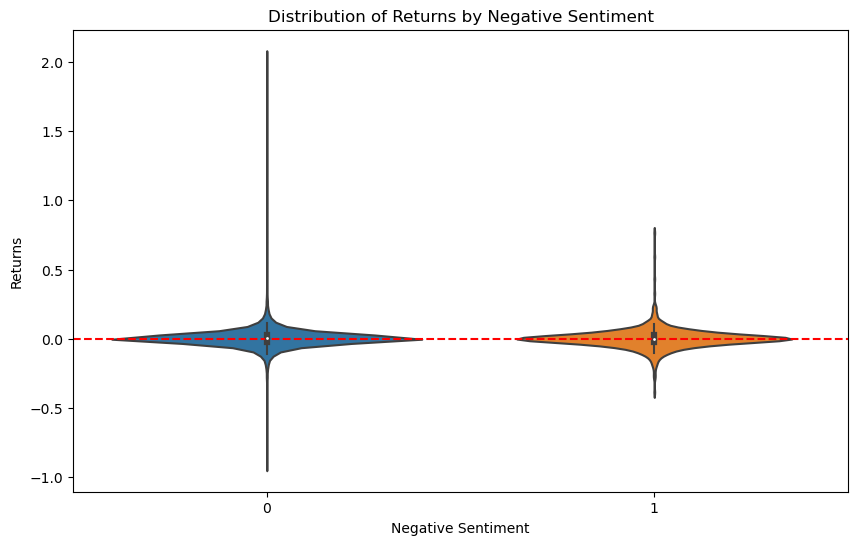

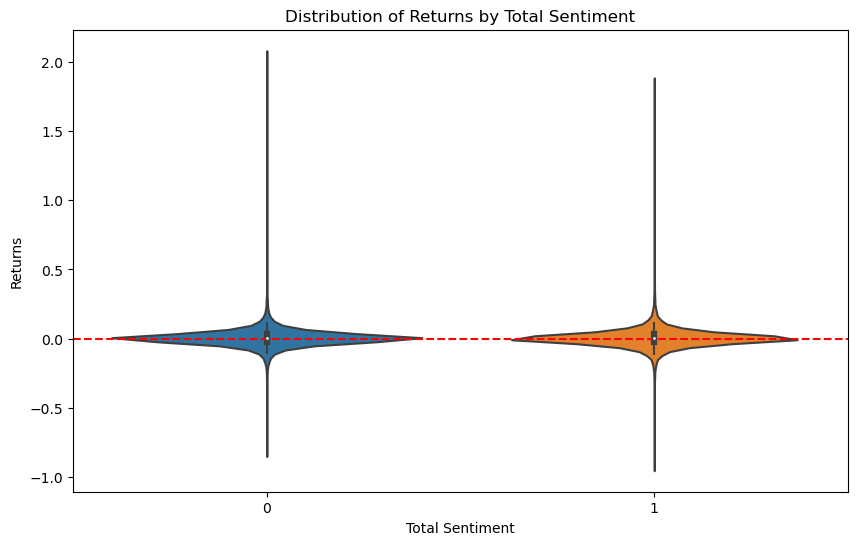

In [9]:
# Box plot for dummy_positive
plot_with_lines(russell, 'dummy_positive', 'next_week_return', 'Distribution of Returns by Positive Sentiment')

# Box plot for dummy_negative
plot_with_lines(russell, 'dummy_negative', 'next_week_return', 'Distribution of Returns by Negative Sentiment')

# Box plot for dummy_total
plot_with_lines(russell, 'dummy_total', 'next_week_return', 'Distribution of Returns by Total Sentiment')

# Violin plot for dummy_positive
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_positive', y='next_week_return', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Positive Sentiment')
plt.xlabel('Positive Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_negative
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_negative', y='next_week_return', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Negative Sentiment')
plt.xlabel('Negative Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_total
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_total', y='next_week_return', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Total Sentiment')
plt.xlabel('Total Sentiment')
plt.ylabel('Returns')
plt.show()

In [10]:
from scipy.stats import ttest_ind, mannwhitneyu

# Define a function to remove outliers using Z-score
def remove_outliers(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    df_filtered = df[(z_scores.abs() < threshold)]
    return df_filtered

# Remove outliers from the russell DataFrame
russell = remove_outliers(russell, 'Ask_minus_Bid')
russell = remove_outliers(russell, 'VOL')
russell.to_csv('weekly_russell_regression.csv', index=False)

# Calculate mean and standard deviation (volatility) for each combination of dummy variables
mean_negative = russell[russell['dummy_negative'] == 1]['Ask_minus_Bid'].mean()
std_negative = russell[russell['dummy_negative'] == 1]['Ask_minus_Bid'].std()

mean_positive = russell[russell['dummy_positive'] == 1]['Ask_minus_Bid'].mean()
std_positive = russell[russell['dummy_positive'] == 1]['Ask_minus_Bid'].std()

mean_total = russell[russell['dummy_total'] == 1]['Ask_minus_Bid'].mean()
std_total = russell[russell['dummy_total'] == 1]['Ask_minus_Bid'].std()

# Calculate mean and standard deviation (volatility) when the dummy variables are equal to zero
mean_negative_zero = russell[russell['dummy_negative'] == 0]['Ask_minus_Bid'].mean()
std_negative_zero = russell[russell['dummy_negative'] == 0]['Ask_minus_Bid'].std()

mean_positive_zero = russell[russell['dummy_positive'] == 0]['Ask_minus_Bid'].mean()
std_positive_zero = russell[russell['dummy_positive'] == 0]['Ask_minus_Bid'].std()

mean_total_zero = russell[russell['dummy_total'] == 0]['Ask_minus_Bid'].mean()
std_total_zero = russell[russell['dummy_total'] == 0]['Ask_minus_Bid'].std()

# t-test for mean difference
t_statistic_mean_negative, p_value_mean_negative = ttest_ind(russell[russell['dummy_negative'] == 1]['Ask_minus_Bid'],
                                                             russell[russell['dummy_negative'] == 0]['Ask_minus_Bid'])

t_statistic_mean_positive, p_value_mean_positive = ttest_ind(russell[russell['dummy_positive'] == 1]['Ask_minus_Bid'],
                                                             russell[russell['dummy_positive'] == 0]['Ask_minus_Bid'])

t_statistic_mean_total, p_value_mean_total = ttest_ind(russell[russell['dummy_total'] == 1]['Ask_minus_Bid'],
                                                       russell[russell['dummy_total'] == 0]['Ask_minus_Bid'])

# Mann-Whitney U test for difference in volatility
u_statistic_vol_negative, p_value_vol_negative = mannwhitneyu(russell[russell['dummy_negative'] == 1]['Ask_minus_Bid'],
                                                              russell[russell['dummy_negative'] == 0]['Ask_minus_Bid'])

u_statistic_vol_positive, p_value_vol_positive = mannwhitneyu(russell[russell['dummy_positive'] == 1]['Ask_minus_Bid'],
                                                              russell[russell['dummy_positive'] == 0]['Ask_minus_Bid'])

u_statistic_vol_total, p_value_vol_total = mannwhitneyu(russell[russell['dummy_total'] == 1]['Ask_minus_Bid'],
                                                        russell[russell['dummy_total'] == 0]['Ask_minus_Bid'])

# Create a DataFrame to display the results
data = {
    'Dummy': ['Negative', 'Positive', 'Total'],
    'Mean_with_Dummy': [mean_negative, mean_positive, mean_total],
    'Mean_without_Dummy': [mean_negative_zero, mean_positive_zero, mean_total_zero],
    'Volatility_with_Dummy': [std_negative, std_positive, std_total],
    'Volatility_without_Dummy': [std_negative_zero, std_positive_zero, std_total_zero],
    'Mean_Difference': [mean_negative - mean_negative_zero,
                        mean_positive - mean_positive_zero,
                        mean_total - mean_total_zero],
    'Volatility_Difference': [std_negative - std_negative_zero,
                              std_positive - std_positive_zero,
                              std_total - std_total_zero],
    'Mean_P_value': [p_value_mean_negative, p_value_mean_positive, p_value_mean_total],
    'Volatility_P_value': [p_value_vol_negative, p_value_vol_positive, p_value_vol_total]
}
df_results = pd.DataFrame(data)

# Display the results
print(df_results)

      Dummy  Mean_with_Dummy  Mean_without_Dummy  Volatility_with_Dummy  \
0  Negative         6.257547            5.595836              11.153203   
1  Positive         6.906360            5.475920              12.153104   
2     Total         6.215988            5.101535              12.122113   

   Volatility_without_Dummy  Mean_Difference  Volatility_Difference  \
0                 12.736592         0.661711              -1.583389   
1                 12.771629         1.430440              -0.618525   
2                 13.173548         1.114452              -1.051435   

   Mean_P_value  Volatility_P_value  
0  1.485229e-01        5.396478e-02  
1  1.030055e-23       5.031680e-110  
2  3.722961e-43       1.207813e-294  


In [11]:
# Specify the columns for which to calculate z-scores
columns_to_standardize = ['BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'SHROUT', 'sprtrn', 'market_cap', 'last_week_return', '2_week_ma', '3_week_ma', 
                          '4_week_ma', 'Ask_minus_Bid', 'last_week_volume']

# Group by ticker and standardize each group for specified columns
russell_grouped = russell.groupby('TICKER')[columns_to_standardize]

# Define a function to standardize values within each group
def standardize_group(group):
    group_std = (group - group.mean()) / group.std()
    return group_std

# Apply the standardization function to each group
russell_standardized = russell_grouped.transform(standardize_group)

# Replace original values with standardized values in the original DataFrame
russell[columns_to_standardize] = russell_standardized

# Check the modified DataFrame
print(russell.head())

  TICKER       date   SICCD                    COMNAM  market_cap    SHROUT  \
0      A 2023-01-09  3825.0  AGILENT TECHNOLOGIES INC    1.521682  0.867158   
1      A 2023-01-16  3825.0  AGILENT TECHNOLOGIES INC    1.998631  0.867158   
2      A 2023-01-23  3825.0  AGILENT TECHNOLOGIES INC    1.913152  0.867158   
3      A 2023-01-30  3825.0  AGILENT TECHNOLOGIES INC    1.882646  0.867158   
4      A 2023-02-06  3825.0  AGILENT TECHNOLOGIES INC    1.809625  0.867158   

        VOL       PRC     ASKHI     BIDLO  ...  last_week_volume  2_week_ma  \
0 -0.376345  1.514475  1.611440  1.305345  ...               NaN        NaN   
1 -1.171945  1.999800  1.886507  1.711812  ...         -0.407192   1.804736   
2 -1.035157  1.912820  1.955272  1.951868  ...         -1.210345   2.006697   
3 -1.498350  1.881778  1.880254  1.862643  ...         -1.072259   1.946860   
4 -0.740216  1.807475  1.796901  1.815199  ...         -1.539849   1.893450   

   3_week_ma  4_week_ma  proper?  Ask_minus_Bid  c

Kurtosis:
BIDLO              -0.422529
ASKHI              -0.489401
PRC                -0.477465
VOL                 5.987400
RET                 2.054986
SHROUT             -0.420764
sprtrn              0.478611
market_cap         -0.481709
last_week_return    2.025813
2_week_ma          -0.526872
3_week_ma          -0.561636
4_week_ma          -0.598758
Ask_minus_Bid       4.684074
last_week_volume    6.163300
dtype: float64

Skewness:
BIDLO               0.192707
ASKHI               0.209953
PRC                 0.203672
VOL                 1.949731
RET                 0.058350
SHROUT             -0.126139
sprtrn             -0.338028
market_cap          0.207311
last_week_return    0.064234
2_week_ma           0.199315
3_week_ma           0.189803
4_week_ma           0.178261
Ask_minus_Bid       1.757786
last_week_volume    2.005676
dtype: float64


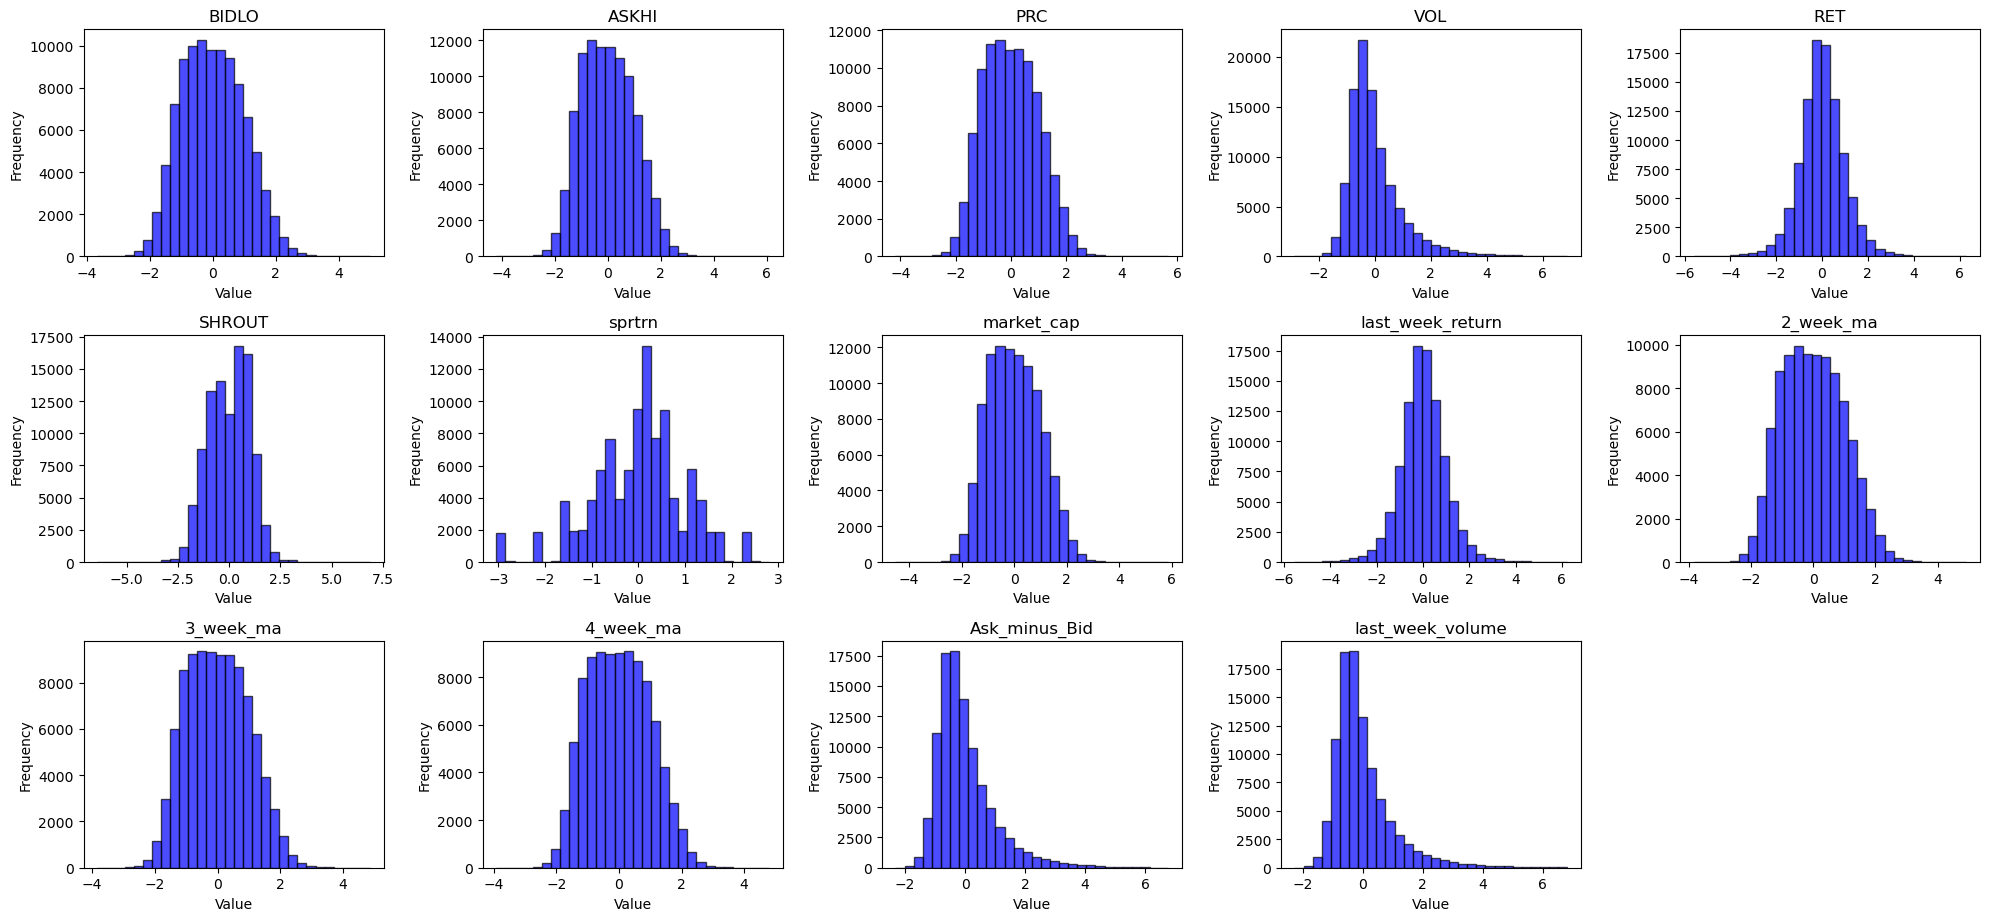

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate kurtosis and skewness for each numeric variable
numeric_columns = ['BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'SHROUT', 'sprtrn', 'market_cap', 'last_week_return', 
                   '2_week_ma', '3_week_ma', '4_week_ma', 'Ask_minus_Bid', 'last_week_volume']
kurtosis_values = russell[numeric_columns].kurtosis()
skewness_values = russell[numeric_columns].skew()

# Print kurtosis and skewness values for each numeric variable
print("Kurtosis:")
print(kurtosis_values)
print("\nSkewness:")
print(skewness_values)

# Plot histograms for each numeric variable
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    plt.hist(russell[col], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [13]:
russell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99904 entries, 0 to 101417
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TICKER            99904 non-null  object        
 1   date              99904 non-null  datetime64[ns]
 2   SICCD             99864 non-null  float64       
 3   COMNAM            99904 non-null  object        
 4   market_cap        99902 non-null  float64       
 5   SHROUT            98951 non-null  float64       
 6   VOL               99902 non-null  float64       
 7   PRC               99902 non-null  float64       
 8   ASKHI             99902 non-null  float64       
 9   BIDLO             99902 non-null  float64       
 10  total             99904 non-null  float64       
 11  negative          99904 non-null  float64       
 12  positive          99904 non-null  float64       
 13  sprtrn            99902 non-null  float64       
 14  RET               999

In [14]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

# Convert specified columns to categorical
russell['SICCD'] = russell['SICCD'].astype('category')
russell['comp_size'] = russell['comp_size'].astype('category')
russell['proper?'] = russell['proper?'].astype('category')
russell['dummy_negative'] = russell['dummy_negative'].astype('category')
russell['dummy_positive'] = russell['dummy_positive'].astype('category')
russell['dummy_total'] = russell['dummy_total'].astype('category')

russell.to_csv('standardized_weekly_russell_regression.csv', index=False)
russell_clean = russell.dropna()

# Select features and target variable
features = russell_clean.drop(columns=['tomorrow_return', 'TICKER', 'COMNAM', 'date'])
target = russell_clean['tomorrow_return']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selector(dtype_exclude="object")),
        ('cat', categorical_transformer, selector(dtype_include="object"))
    ])

# Define LassoCV model
lasso_cv = LassoCV(cv=5, random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('lasso', lasso_cv)])

# Fit the model
pipeline.fit(X_train, y_train)

# Print the best alpha
print("Best alpha:", pipeline.named_steps['lasso'].alpha_)

# Print the R^2 score
print("R^2 score:", pipeline.score(X_test, y_test))

# Access the model coefficients
model_coefs = pipeline.named_steps['lasso'].coef_
print("Model coefficients:", model_coefs)

KeyError: "['tomorrow_return'] not found in axis"

In [ ]:
russell = russell.dropna()

# Add a new column 'pred_lasso' to the russell dataframe with predictions
russell['pred_lasso'] = pipeline.predict(russell.drop(columns=['tomorrow_return', 'TICKER', 'COMNAM', 'date']))

# Display the first few rows of the dataframe to verify the new column
print(russell.head())

plt.hist(russell['pred_lasso'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Predicted Lasso Distribution')
plt.xlabel('Predicted Lasso Returns')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=12)

# Create pipeline
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('random_forest', rf_model)])

# Define parameter grid
param_grid = {
    'random_forest__n_estimators': [50, 100],
    'random_forest__max_depth': [None, 10],
    'random_forest__min_samples_split': [2, 5],
    'random_forest__min_samples_leaf': [1, 2]
}

# Perform grid search with reduced parameters and folds
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Print the best R^2 score
print("Best R^2 score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test set R^2 score of the best model:", test_score)
